In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import wave
import sys
%matplotlib inline

In [5]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

/usr/local/lib/python3.7/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [6]:
rate, data = wav.read('Recording.wav')
fft_out = fft(data)

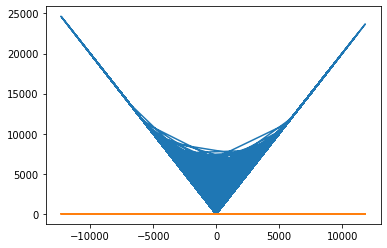

In [7]:
plt.plot(data, np.abs(fft_out))
plt.show()

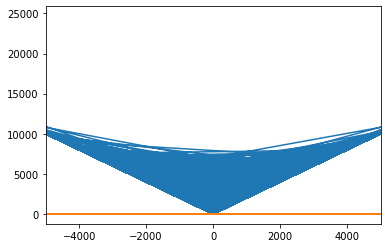

In [8]:
plt.xlim([-5000,5000])
plt.plot(data, np.abs(fft_out))
plt.show()

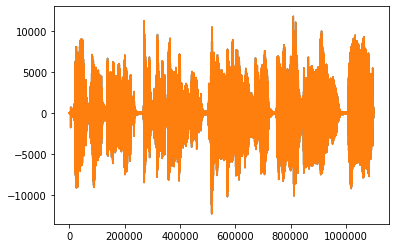

In [9]:
plt.plot(data)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


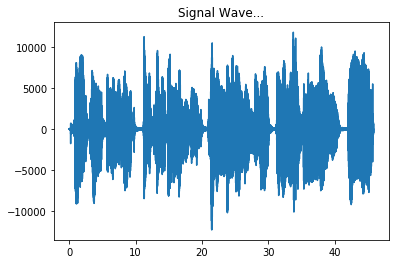

In [10]:
spf = wave.open('Recording.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, 'Int16')

fs = spf.getframerate()
Time=np.linspace(0, len(signal)/fs, num=len(signal))

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(Time,signal)
plt.show()

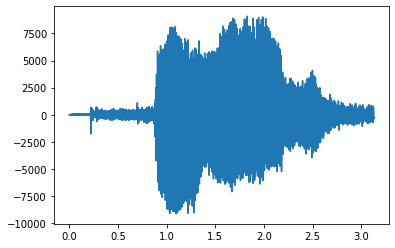

In [11]:
plt.plot(Time[0:150000],signal[0:150000])
plt.show()

In [12]:
len(Time)

2199552

In [13]:
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

song = AudioSegment.from_wav("Recording.wav")

chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 200,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -20
)

for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.wav.".format(i))
    normalized_chunk.export(
        "./chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav"
    )

Exporting chunk0.wav.
Exporting chunk1.wav.
Exporting chunk2.wav.
Exporting chunk3.wav.
Exporting chunk4.wav.


In [14]:
song.channels

2

In [15]:
chunks